In [ ]:
import torch
if torch.cuda.is_available():
    device = "cuda"
    dtype = torch.float16
else:
    device = "cpu"
    dtype = torch.float32

### Stable Diffusion

In [ ]:
from diffusers import AutoPipelineForText2Image

def load_model():
    pipeline = AutoPipelineForText2Image.from_pretrained(
        "CompVis/stable-diffusion-v1-4",
        torch_dtype=dtype
    )
    pipeline.to(device)
    return pipeline

In [ ]:
pipeline = load_model()

print(f"On device {pipeline.device}")
pipeline

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

scheduler_config.json:   0%|          | 0.00/313 [00:00<?, ?B/s]

scheduler_config-checkpoint.json:   0%|          | 0.00/209 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

safety_checker/model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

text_encoder/model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/551 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

unet/diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

vae/diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`torch_dtype` is deprecated! Use `dtype` instead!


On device cuda:0


StableDiffusionPipeline {
  "_class_name": "StableDiffusionPipeline",
  "_diffusers_version": "0.35.2",
  "_name_or_path": "CompVis/stable-diffusion-v1-4",
  "feature_extractor": [
    "transformers",
    "CLIPImageProcessor"
  ],
  "image_encoder": [
    null,
    null
  ],
  "requires_safety_checker": true,
  "safety_checker": [
    "stable_diffusion",
    "StableDiffusionSafetyChecker"
  ],
  "scheduler": [
    "diffusers",
    "PNDMScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}


- `prompt`: An image generation prompt, as a string.
- `pipeline`: A Stable Diffusion pipeline object.
- `n`: The number of images to create, as an integer.


In [ ]:
def generate_images(prompt, pipeline, n):
    output = pipeline(
        [prompt] * n,
    )
    return output.images


  0%|          | 0/50 [00:00<?, ?it/s]

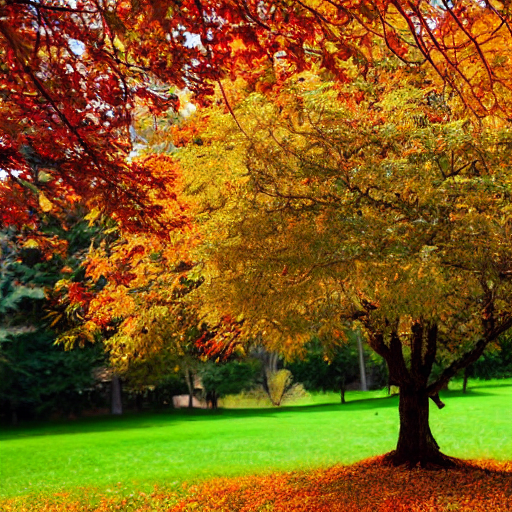

In [ ]:
images = generate_images("Tree with autumn foliage", pipeline, 2)

images[0]

In [ ]:
def generate_images(prompt, pipeline, n, guidance=7.5):
    output = pipeline(
        [prompt] * n, guidance_scale=guidance
    )
    return output.images


  0%|          | 0/50 [00:00<?, ?it/s]

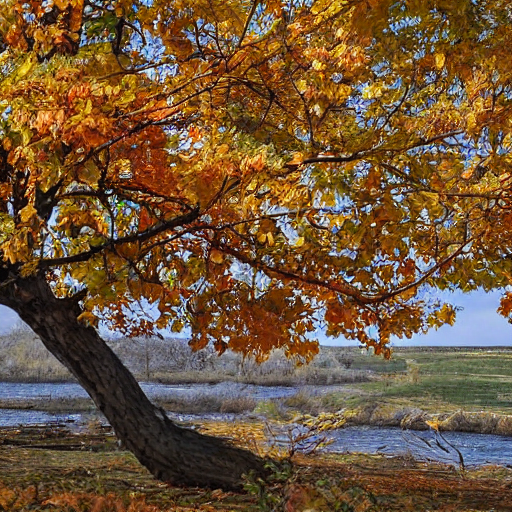

In [ ]:
images = generate_images("Tree with autumn foliage", pipeline, 2, guidance=3.0)

images[0]

In [ ]:
def generate_images(prompt, pipeline, n, guidance=7.5, steps=50):
    output = pipeline(
        [prompt] * n, guidance_scale=guidance, num_inference_steps=steps
    )
    return output.images



  0%|          | 0/20 [00:00<?, ?it/s]

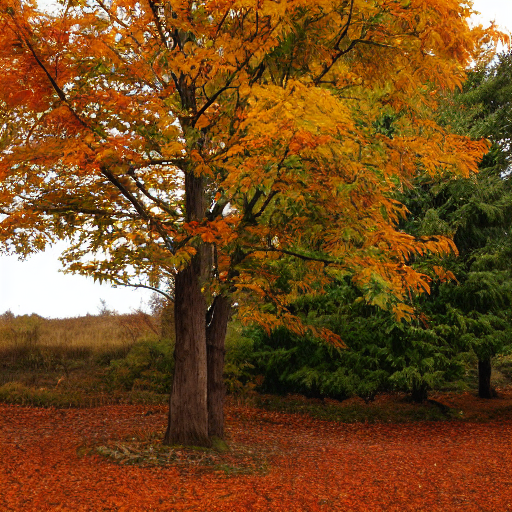

In [ ]:
images = generate_images(
    "Tree with autumn foliage", pipeline, 2, guidance=7, steps=20
)

images[0]

In [ ]:
style_dict = {
    'none': '',
    'anime': 'cartoon, animated, Studio Ghibli style, cute, Japanese animation',
    'photo': 'photograph, film, 35 mm camera',
    'video game': 'rendered in unreal engine, hyper-realistic, volumetric lighting, --ar 9:16 --hd --q 2',
    'watercolor': 'painting, watercolors, pastel, composition'
}


In [ ]:
def generate_images(prompt, pipeline, n, guidance=7.5, steps=50, style="none"):
    style_text = style_dict[style]
    output = pipeline(
        [prompt + style_text] * n, guidance_scale=guidance, num_inference_steps=steps
    )
    return output.images



  0%|          | 0/20 [00:00<?, ?it/s]

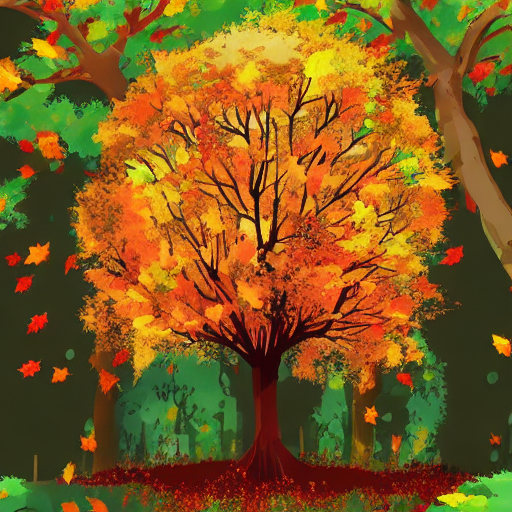

In [ ]:
images = generate_images(
    "Tree with autumn foliage", pipeline, 2, steps=20, style="anime"
)

images[0]

![](images/streamlit-view-switch.png)

In [ ]:
pip install gradio

In [ ]:
def generate_image_gradio(prompt, num_images, guidance, steps, style):
    images = generate_images(prompt, pipeline, num_images, guidance=guidance, steps=steps, style=style)
    return images

print("The generate_image_gradio .")

The generate_image_gradio .


In [ ]:
import torch
import gradio as gr
from diffusers import AutoPipelineForText2Image

if torch.cuda.is_available():
    device = "cuda"
    dtype = torch.float16
else:
    device = "cpu"
    dtype = torch.float32

print(f"Using device: {device} with dtype: {dtype}")

def load_model():
    pipeline_obj = AutoPipelineForText2Image.from_pretrained(
        "CompVis/stable-diffusion-v1-4",
        torch_dtype=dtype
    )
    pipeline_obj.to(device)
    return pipeline_obj

pipeline = load_model()
print(f"Stable Diffusion pipeline loaded on device: {pipeline.device}")

style_dict = {
    'none': '',
    'anime': 'cartoon, animated, Studio Ghibli style, cute, Japanese animation',
    'photo': 'photograph, film, 35 mm camera',
    'video game': 'rendered in unreal engine, hyper-realistic, volumetric lighting, --ar 9:16 --hd --q 2',
    'watercolor': 'painting, watercolors, pastel, composition'
}

def generate_images(prompt, pipeline_obj, n, guidance=7.5, steps=50, style="none"):
    style_text = style_dict[style]
    output = pipeline_obj(
        [prompt + style_text] * n, guidance_scale=guidance, num_inference_steps=steps
    )
    return output.images

def generate_image_gradio(prompt, num_images, guidance, steps, style):
    images = generate_images(prompt, pipeline, num_images, guidance=guidance, steps=steps, style=style)
    return images

interface = gr.Interface(
    fn=generate_image_gradio,
    inputs=[
        gr.Textbox(label="Prompt"),
        gr.Slider(minimum=1, maximum=4, value=1, step=1, label="Number of Images"),
        gr.Slider(minimum=1.0, maximum=10.0, value=7.5, step=0.5, label="Guidance Scale"),
        gr.Slider(minimum=10, maximum=100, value=50, step=5, label="Inference Steps"),
        gr.Dropdown(list(style_dict.keys()), value='none', label="Style")
    ],
    outputs=gr.Gallery(label="Generated Images"),
    title="Stable Diffusion Image Generator",
    description="Generate images using Stable Diffusion with various parameters."
)

interface.launch(debug=True)

Using device: cuda with dtype: torch.float16


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Stable Diffusion pipeline loaded on device: cuda:0
It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://58752a64b64a86c10d.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]